In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("dark")

%reload_ext autoreload
%autoreload 2


In [2]:
weather = pd.read_csv ('climate_data.csv')
weather

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.00,0.00,...,4.0,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.00,0.00,...,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.00,0.00,...,8.0,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.00,0.00,...,7.0,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.00,0.00,...,5.0,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3897,2020-07-24,64.1,62.0,49.8,29.6,3.6,5.8,240.0,0.24,4.38,...,86.0,35.0,29.686,29.577,15.0,25.3,77.4,2020-07-24,7,0.109
3898,2020-07-25,62.8,60.0,48.1,29.7,2.5,4.0,242.0,0.33,4.47,...,90.0,36.0,29.781,29.645,8.1,17.3,77.5,2020-07-25,7,0.136
3899,2020-07-26,60.6,68.0,48.9,29.8,1.7,2.9,357.0,0.33,4.47,...,90.0,40.0,29.930,29.745,11.5,15.0,77.5,2020-07-26,7,0.185
3900,2020-07-27,61.7,64.0,47.4,29.9,2.2,4.0,66.0,0.33,4.47,...,96.0,35.0,29.941,29.781,13.8,18.4,78.2,2020-07-27,7,0.160


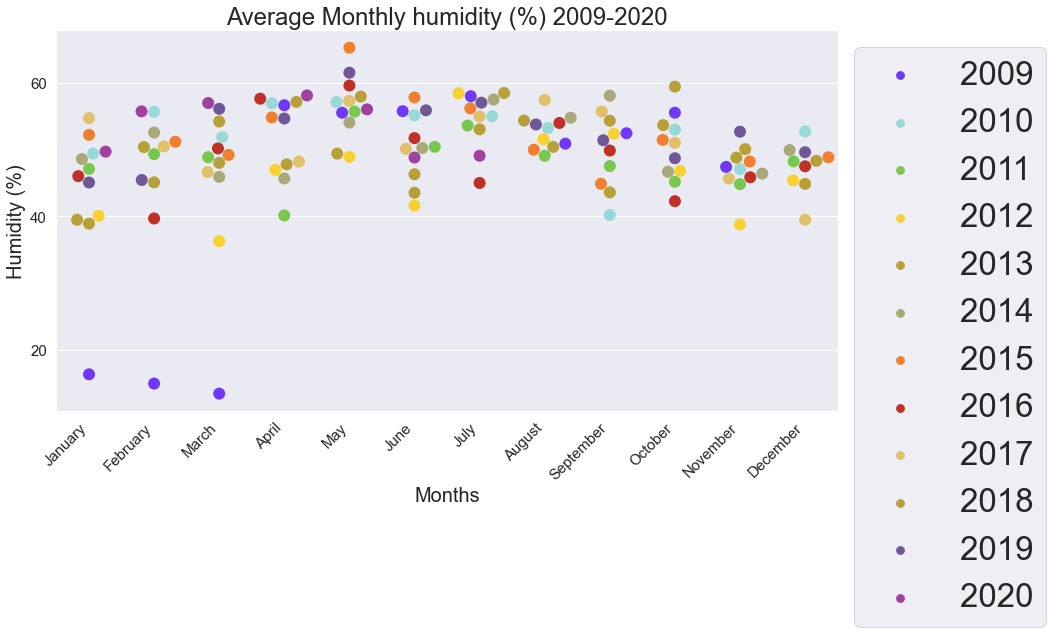

In [15]:
# Calculating data
humidity = weather
humidity["Date"] = pd.to_datetime(humidity["Date"])
humidity = humidity.set_index("Date")
humidity["Average Humidity (%)"] = (humidity["Minimum humidity (%)"] + humidity["Maximum humidity (%)"]) / 2.0
resampled_humidity = humidity["Average Humidity (%)"].resample("M").mean().to_frame()
resampled_humidity["Month"] = resampled_humidity.index.month
resampled_humidity.reset_index(inplace=True)

#Plotting

fig, ax = plt.subplots(figsize = (14,7))  
years = resampled_humidity["Date"].dt.strftime("%Y").sort_values()
palette_months = ["#7038F8", "#98D8D8", "#78C850", "#F8D030", "#B8A038", "#A8A878", "#F08030", "#C03028", "#E0C068", "#B8A038", "#705898", "#A040A0"]
fig = sns.swarmplot(x="Month", y="Average Humidity (%)", data=resampled_humidity, hue=years, size=12, edgecolor="gray", palette=palette_months)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
x_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
ax.set_xticklabels(labels=x_months, rotation=45, ha='right')

plt.ylabel("Humidity (%)", fontsize=20)
plt.xlabel("Months", fontsize=20)
plt.title("Average Monthly humidity (%) 2009-2020", fontsize=24)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [3]:
# pd.to_datetime(weather)
weather.Date = pd.to_datetime(weather.Date)
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3902 entries, 0 to 3901
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      3902 non-null   datetime64[ns]
 1   Average temperature (°F)  3902 non-null   float64       
 2   Average humidity (%)      3902 non-null   float64       
 3   Average dewpoint (°F)     3902 non-null   float64       
 4   Average barometer (in)    3902 non-null   float64       
 5   Average windspeed (mph)   3902 non-null   float64       
 6   Average gustspeed (mph)   3902 non-null   float64       
 7   Average direction (°deg)  3902 non-null   float64       
 8   Rainfall for month (in)   3902 non-null   float64       
 9   Rainfall for year (in)    3902 non-null   float64       
 10  Maximum rain per minute   3902 non-null   float64       
 11  Maximum temperature (°F)  3902 non-null   float64       
 12  Minimum temperature 

In [4]:
#extract year
weather['Year'] = weather['Date'].dt.year
weather

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure,Year
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.00,0.00,...,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166,2009
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.00,0.00,...,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401,2009
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.00,0.00,...,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972,2009
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.00,0.00,...,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339,2009
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.00,0.00,...,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3897,2020-07-24,64.1,62.0,49.8,29.6,3.6,5.8,240.0,0.24,4.38,...,35.0,29.686,29.577,15.0,25.3,77.4,2020-07-24,7,0.109,2020
3898,2020-07-25,62.8,60.0,48.1,29.7,2.5,4.0,242.0,0.33,4.47,...,36.0,29.781,29.645,8.1,17.3,77.5,2020-07-25,7,0.136,2020
3899,2020-07-26,60.6,68.0,48.9,29.8,1.7,2.9,357.0,0.33,4.47,...,40.0,29.930,29.745,11.5,15.0,77.5,2020-07-26,7,0.185,2020
3900,2020-07-27,61.7,64.0,47.4,29.9,2.2,4.0,66.0,0.33,4.47,...,35.0,29.941,29.781,13.8,18.4,78.2,2020-07-27,7,0.160,2020


In [5]:
#transform avg T°F in T°C
weather['Average_Temparature_°C'] = round((weather ['Average temperature (°F)']-32)/1.8)
weather

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure,Year,Average_Temparature_°C
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.00,0.00,...,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166,2009,3.0
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.00,0.00,...,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401,2009,6.0
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.00,0.00,...,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972,2009,-4.0
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.00,0.00,...,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339,2009,-13.0
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.00,0.00,...,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665,2009,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3897,2020-07-24,64.1,62.0,49.8,29.6,3.6,5.8,240.0,0.24,4.38,...,29.686,29.577,15.0,25.3,77.4,2020-07-24,7,0.109,2020,18.0
3898,2020-07-25,62.8,60.0,48.1,29.7,2.5,4.0,242.0,0.33,4.47,...,29.781,29.645,8.1,17.3,77.5,2020-07-25,7,0.136,2020,17.0
3899,2020-07-26,60.6,68.0,48.9,29.8,1.7,2.9,357.0,0.33,4.47,...,29.930,29.745,11.5,15.0,77.5,2020-07-26,7,0.185,2020,16.0
3900,2020-07-27,61.7,64.0,47.4,29.9,2.2,4.0,66.0,0.33,4.47,...,29.941,29.781,13.8,18.4,78.2,2020-07-27,7,0.160,2020,16.0


In [6]:
weatherPT = weather.pivot_table(index = 'Month', columns = 'Year', values = 'Average_Temparature_°C')
weatherPT

Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Month,,,,,,,,,,,,
1,-0.516129,-2.096774,-2.225806,0.096774,-2.483871,-1.774194,0.290323,-1.612903,-3.483871,1.290323,-1.607143,-1.580645
2,0.714286,-4.535714,-4.178571,NaN,-3.178571,-2.428571,-0.785714,1.931034,1.045455,-2.518519,-2.642857,-3.793103
3,1.964286,1.129032,3.666667,5.161290,1.258065,2.000000,3.677419,1.354839,5.483871,2.666667,-0.866667,1.870968
4,3.733333,3.800000,2.500000,7.433333,1.500000,4.500000,4.833333,4.333333,6.904762,5.133333,5.666667,3.500000
5,10.161290,7.466667,7.129032,10.096774,10.961538,8.379310,7.470588,7.774194,9.333333,10.935484,6.161290,10.354839
6,13.133333,15.066667,14.566667,18.666667,16.366667,14.333333,15.600000,16.566667,16.379310,17.133333,13.107143,15.333333
7,16.096774,17.600000,18.944444,18.290323,16.000000,17.258065,17.000000,18.838710,17.612903,17.307692,17.451613,18.535714
8,15.806452,16.806452,18.612903,17.000000,16.322581,15.612903,17.032258,15.064516,14.935484,16.580645,17.032258,NaN
9,12.833333,15.000000,13.250000,12.566667,11.571429,12.428571,14.700000,13.333333,12.266667,14.071429,14.200000,NaN


### 1) Heatmap

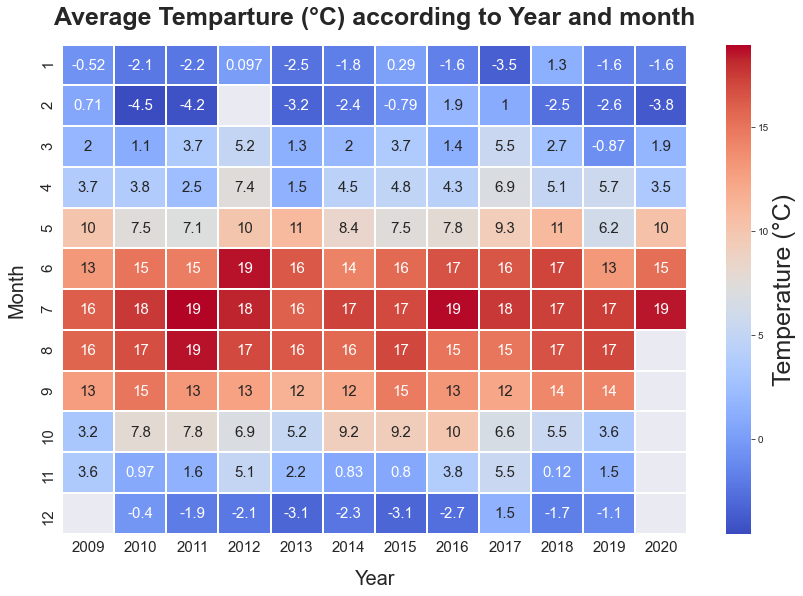

In [7]:
plt.figure(figsize=(14,9))
ax = sns.heatmap(weatherPT, cmap = 'coolwarm', linecolor = 'white', linewidth = 1, annot = True , annot_kws={"size":15})

ax.figure.axes[-1].set_ylabel('Temperature (°C)', size=25)

sns.set(font_scale=3)
cmap = sns.diverging_palette(200, 20, sep=20, as_cmap=True)


plt.xlabel('Year', labelpad=15, fontsize = 20)
plt.ylabel('Month', labelpad=15, fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Average Temparture (°C) according to Year and month' ,pad=20, fontsize = 25, weight='bold')
#cbar.set_label(label='Gust speed (kph)', size='large', weight='bold', fontsize = 20)

plt.show()


In [8]:
weather['Avg_windspeed_kph'] = weather['Average windspeed (mph)']*1.609
weather['Avg_gustspeed_kph'] = weather['Average gustspeed (mph)']*1.609

weather

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure,Year,Average_Temparature_°C,Avg_windspeed_kph,Avg_gustspeed_kph
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.00,0.00,...,41.4,59.0,40.0,2009-01-01,1,0.166,2009,3.0,42.4776,59.2112
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.00,0.00,...,35.7,51.0,52.0,2009-01-02,1,0.401,2009,6.0,20.5952,28.9620
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.00,0.00,...,25.3,38.0,41.0,2009-01-03,1,0.972,2009,-4.0,13.3547,19.6298
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.00,0.00,...,12.7,20.0,32.0,2009-01-04,1,0.339,2009,-13.0,4.6661,7.2405
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.00,0.00,...,38.0,53.0,32.0,2009-01-05,1,0.665,2009,-5.0,26.8703,37.1679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3897,2020-07-24,64.1,62.0,49.8,29.6,3.6,5.8,240.0,0.24,4.38,...,15.0,25.3,77.4,2020-07-24,7,0.109,2020,18.0,5.7924,9.3322
3898,2020-07-25,62.8,60.0,48.1,29.7,2.5,4.0,242.0,0.33,4.47,...,8.1,17.3,77.5,2020-07-25,7,0.136,2020,17.0,4.0225,6.4360
3899,2020-07-26,60.6,68.0,48.9,29.8,1.7,2.9,357.0,0.33,4.47,...,11.5,15.0,77.5,2020-07-26,7,0.185,2020,16.0,2.7353,4.6661
3900,2020-07-27,61.7,64.0,47.4,29.9,2.2,4.0,66.0,0.33,4.47,...,13.8,18.4,78.2,2020-07-27,7,0.160,2020,16.0,3.5398,6.4360


In [9]:
weather.describe()

,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),Maximum rain per minute,...,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Month,diff_pressure,Year,Average_Temparature_°C,Avg_windspeed_kph,Avg_gustspeed_kph
count,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.0,...,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000
mean,44.670733,48.878011,23.127037,29.881420,5.758893,10.011968,216.037417,0.451105,5.486171,0.0,...,29.701622,19.840748,33.974910,58.086315,6.395695,0.343829,2014.409790,7.037160,9.266059,16.109257
std,15.326793,17.438153,14.634088,0.250395,4.022485,14.117446,97.677761,0.603462,4.534444,0.0,...,0.451691,12.235410,38.632424,17.953453,3.430231,0.407499,3.353548,8.505101,6.472178,22.714971
min,-12.100000,9.000000,-22.200000,28.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,13.266000,0.000000,0.000000,-6.100000,1.000000,0.000000,2009.000000,-24.000000,0.000000,0.000000
25%,33.700000,36.000000,12.100000,29.700000,2.700000,4.500000,116.000000,0.050000,0.980000,0.0,...,29.562000,13.800000,19.600000,43.900000,3.000000,0.220000,2012.000000,1.000000,4.344300,7.240500
50%,45.100000,47.000000,22.500000,29.900000,4.600000,7.100000,253.000000,0.220000,5.080000,0.0,...,29.711000,18.400000,27.600000,57.200000,6.000000,0.293000,2014.000000,7.000000,7.401400,11.423900
75%,58.000000,61.000000,35.400000,30.000000,8.000000,12.100000,282.000000,0.670000,9.047500,0.0,...,29.869000,24.200000,34.500000,77.300000,9.000000,0.395000,2017.000000,14.000000,12.872000,19.468900
max,76.300000,94.000000,55.100000,31.000000,26.400000,240.400000,360.000000,4.480000,16.410000,0.0,...,30.855000,181.700000,255.300000,88.400000,12.000000,16.602000,2020.000000,25.000000,42.477600,386.803600


In [10]:
weather.loc[weather['Avg_gustspeed_kph'].idxmax()]

Date                        2010-05-19 00:00:00
Average temperature (°F)                   48.8
Average humidity (%)                         50
Average dewpoint (°F)                      30.4
Average barometer (in)                     29.7
Average windspeed (mph)                    14.8
Average gustspeed (mph)                   240.4
Average direction (°deg)                      2
Rainfall for month (in)                    1.69
Rainfall for year (in)                     5.46
Maximum rain per minute                       0
Maximum temperature (°F)                   55.9
Minimum temperature (°F)                   41.5
Maximum humidity (%)                         76
Minimum humidity (%)                         37
Maximum pressure                          29.76
Minimum pressure                         29.574
Maximum windspeed (mph)                    19.6
Maximum gust speed (mph)                    255
Maximum heat index (°F)                    55.9
Date1                                201

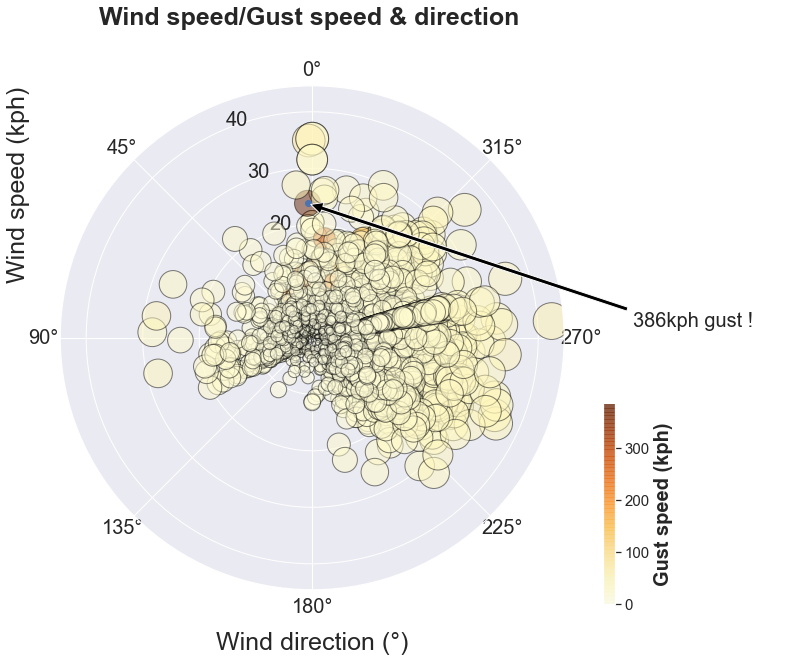

In [11]:

r = weather['Avg_windspeed_kph']
theta = np.deg2rad(weather['Average direction (°deg)'])
area = 15 * r**1.2
fig = plt.figure(figsize=(17,8))

ax = fig.add_subplot(111, projection='polar')
#ax.annotate  ('N')
colors = weather['Avg_gustspeed_kph']

sc = ax.scatter(theta,r,s = area, edgecolors='Black', alpha = 0.5,c=colors, cmap='YlOrBr')

ax.set_theta_zero_location('N')


#ax.set_xticks(np.arange(0,2.0*np.pi,np.pi/6.0))

#ax.set_ylim(0,4)
#ax.set_yticks(fontsize=15)
plt.xlabel('Wind direction (°)', labelpad=15, fontsize = 25)
plt.ylabel('Wind speed (kph)', labelpad=30, fontsize = 25, loc = 'top')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# 1. make colorbar
cax = fig.add_axes([0.75,0.1,0.01,0.35])
cbar = fig.colorbar(sc, cax=cax)
cbar.set_label(label='Gust speed (kph)', size='large', weight='bold', fontsize = 20)
cbar.ax.tick_params(labelsize=15)
#cbar.set_ticks(fontsize=16)
#cbar.set_label(label, fontsize=25)

# 3. move title upwards, then adjust top spacing
ax.set_title("Wind speed/Gust speed & direction ", va='bottom', y=1.1, fontsize = 25, weight='bold')
plt.subplots_adjust(top=1)

ind = 468
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('386kph gust !',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.8, 0.5),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.01),
            horizontalalignment='left',
            verticalalignment='bottom',fontsize = 20
            )

#plt.savefig("polar_coordinates_03.png", bbox_inches='tight')

plt.show()

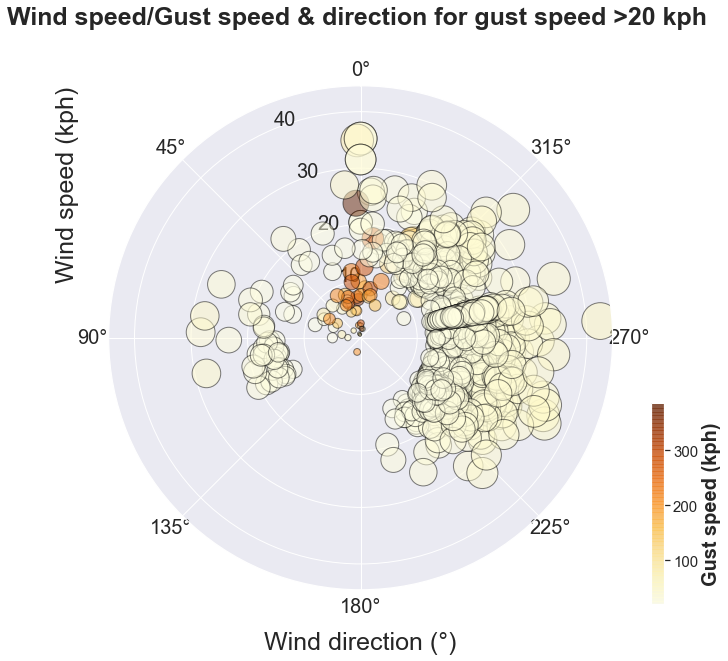

In [12]:
weather2 = weather[weather['Avg_gustspeed_kph']>20]

r = weather2['Avg_windspeed_kph']
theta = np.deg2rad(weather2['Average direction (°deg)'])
area = 15 * r**1.2
fig = plt.figure(figsize=(17,8))

ax = fig.add_subplot(111, projection='polar')
#ax.annotate  ('N')
colors = weather2['Avg_gustspeed_kph']

sc = ax.scatter(theta,r,s = area, edgecolors='Black', alpha = 0.5,c=colors, cmap='YlOrBr')

ax.set_theta_zero_location('N')


#ax.set_xticks(np.arange(0,2.0*np.pi,np.pi/6.0))

#ax.set_ylim(0,4)
#ax.set_yticks(fontsize=15)
plt.xlabel('Wind direction (°)', labelpad=15, fontsize = 25)
plt.ylabel('Wind speed (kph)', labelpad=30, fontsize = 25, loc = 'top')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# 1. make colorbar
cax = fig.add_axes([0.75,0.1,0.01,0.35])
cbar = fig.colorbar(sc, cax=cax)
cbar.set_label(label='Gust speed (kph)', size='large', weight='bold', fontsize = 20)
cbar.ax.tick_params(labelsize=15)
#cbar.set_ticks(fontsize=16)
#cbar.set_label(label, fontsize=25)

# 3. move title upwards, then adjust top spacing
ax.set_title("Wind speed/Gust speed & direction for gust speed >20 kph ", va='bottom', y=1.1, fontsize = 25, weight='bold')
plt.subplots_adjust(top=1)

#plt.savefig("polar_coordinates_03.png", bbox_inches='tight')

plt.show()

(array([ 0., 20., 40., 60., 80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

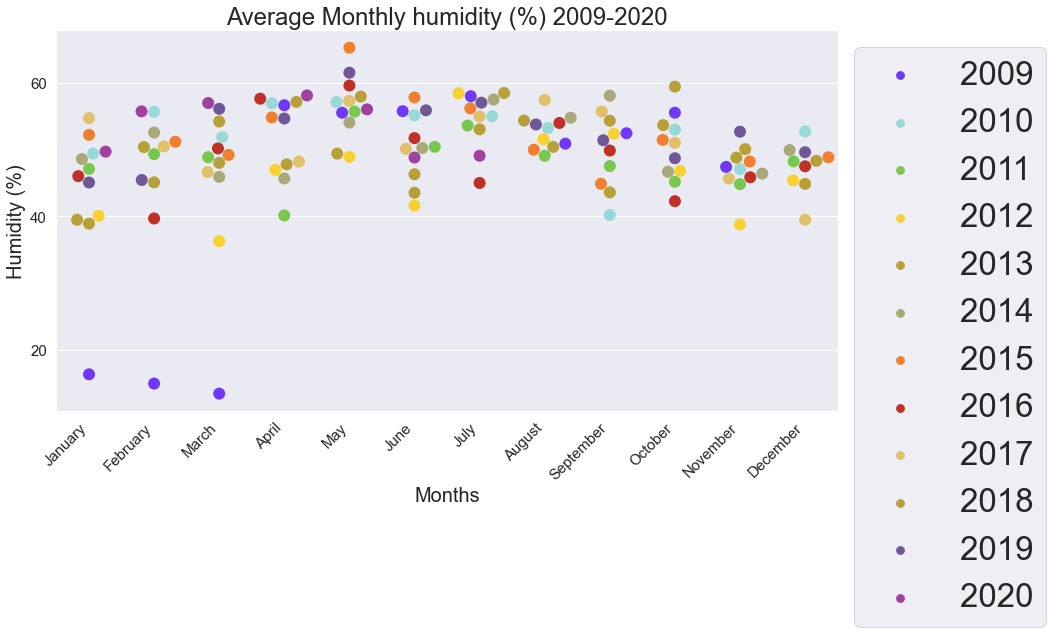

In [13]:
# Calculating data
humidity = weather
humidity["Date"] = pd.to_datetime(humidity["Date"])
humidity = humidity.set_index("Date")
humidity["Average Humidity (%)"] = (humidity["Minimum humidity (%)"] + humidity["Maximum humidity (%)"]) / 2.0
resampled_humidity = humidity["Average Humidity (%)"].resample("M").mean().to_frame()
resampled_humidity["Month"] = resampled_humidity.index.month
resampled_humidity.reset_index(inplace=True)

#Plotting

fig, ax = plt.subplots(figsize = (14,7))  
years = resampled_humidity["Date"].dt.strftime("%Y").sort_values()
palette_months = ["#7038F8", "#98D8D8", "#78C850", "#F8D030", "#B8A038", "#A8A878", "#F08030", "#C03028", "#E0C068", "#B8A038", "#705898", "#A040A0"]
fig = sns.swarmplot(x="Month", y="Average Humidity (%)", data=resampled_humidity, hue=years, size=12, edgecolor="gray", palette=palette_months)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
x_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
ax.set_xticklabels(labels=x_months, rotation=45, ha='right')

plt.ylabel("Humidity (%)", fontsize=20)
plt.xlabel("Months", fontsize=20)
plt.title("Average Monthly humidity (%) 2009-2020", fontsize=24)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)